# Where should a drinks company run promotions?

## 📖 Background
Your company owns a chain of stores across Russia that sell a variety of alcoholic drinks. The company recently ran a wine promotion in Saint Petersburg that was very successful. Due to the cost to the business, it isn’t possible to run the promotion in all regions. The marketing team would like to target 10 other regions that have similar buying habits to Saint Petersburg where they would expect the promotion to be similarly successful.

### The data
The marketing team has sourced you with historical sales volumes per capita for several different drinks types.

- "year" - year (1998-2016)
- "region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast
- "wine" - sale of wine in litres by year per capita
- "beer" - sale of beer in litres by year per capita
- "vodka" - sale of vodka in litres by year per capita
- "champagne" - sale of champagne in litres by year per capita
- "brandy" - sale of brandy in litres by year per capita

## 💪 Competition challenge (by Datacamp)

1. Recommend 10 additional regions they should select for the promotion.
2. Tell the story that supports your recommendations.

# Packages

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


# Data Ingestion

In [2]:
df = pd.read_csv('russia_alcohol.csv')
df.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


## Learning about the data

### 1. Missing values identification

In [3]:
# Counting the total of missing values 
df.isnull().sum()

year          0
region        0
wine         63
beer         58
vodka        61
champagne    63
brandy       66
dtype: int64

In [4]:
# Discovering the regions with null values
drinks = ['wine','beer','vodka','champagne','brandy']

null_count = df[df[drinks].isnull().any(axis=1)].copy()
null_count['null_count'] = null_count[drinks].isnull().sum(axis=1)
na_count_by_region = null_count.groupby('region')['null_count'].sum()
na_count_by_region

region
Chechen Republic          92
Republic of Crimea        80
Republic of Ingushetia    59
Sevastopol                80
Name: null_count, dtype: int64

In [5]:
# Excluding all lines with missing values
regions_to_filter = ['Chechen Republic', 'Republic of Crimea', 'Republic of Ingushetia', 'Sevastopol']

non_null_filtered_df = df[df['region'].isin(regions_to_filter)].dropna()
non_null_filtered_df

,year,region,wine,beer,vodka,champagne,brandy
272,2001,Republic of Ingushetia,9.9,9.5,4.0,1.3,1.5
357,2002,Republic of Ingushetia,7.5,8.7,4.3,0.8,0.8
442,2003,Republic of Ingushetia,6.0,8.9,4.6,0.8,0.5
527,2004,Republic of Ingushetia,6.4,7.4,3.6,0.8,0.8
1391,2014,Republic of Crimea,3.7,16.2,3.9,0.8,1.1
1423,2014,Sevastopol,5.6,26.0,5.1,2.1,1.3
1476,2015,Republic of Crimea,4.0,42.8,3.8,1.6,0.9
1508,2015,Sevastopol,5.0,15.2,4.1,2.0,0.9
1561,2016,Republic of Crimea,4.4,42.1,5.1,1.7,0.7
1593,2016,Sevastopol,5.4,22.9,7.0,1.8,1.1


#### 1.1 Handling with missing values


From the above analysis, we can see that only a few lines containing the regions Chechnya Republic, Crimea Republic, Ingushetia Republic and Sevastopol do not have null values. Therefore, it's not a problem to completely drop the regions with at least one missing value.

In [6]:
df = df[~df['region'].isin(regions_to_filter)]
df.isnull().sum()

year         0
region       0
wine         0
beer         0
vodka        0
champagne    0
brandy       0
dtype: int64

### 2. Understanding the region of Saint Petersburg

In [7]:
# Creating a column with total litres in original dataset
df['total_litres'] = df.apply(lambda x: x.wine + x.beer + x.vodka + x.champagne + x.brandy, axis=1)

# Filtering the region of Saint Petersburg
df_sp = df[df['region']=='Saint Petersburg'].set_index('year')
df_sp

,region,wine,beer,vodka,champagne,brandy,total_litres
year,,,,,,,
1998,Saint Petersburg,2.7,27.90,12.30,1.20,0.50,44.60
1999,Saint Petersburg,2.6,57.40,13.00,1.70,0.60,75.30
2000,Saint Petersburg,4.4,68.20,14.70,2.00,0.90,90.20
2001,Saint Petersburg,6.2,101.00,15.50,2.40,0.80,125.90
2002,Saint Petersburg,6.3,104.60,17.20,2.60,0.90,131.60
2003,Saint Petersburg,6.6,105.60,14.30,2.80,1.00,130.30
2004,Saint Petersburg,4.7,103.90,13.90,2.50,0.80,125.80
2005,Saint Petersburg,10.3,104.80,16.20,2.40,1.10,134.80
2006,Saint Petersburg,7.6,125.30,16.40,2.40,1.40,153.10


#### 2.1 Litres per capita in Saint Petersburg

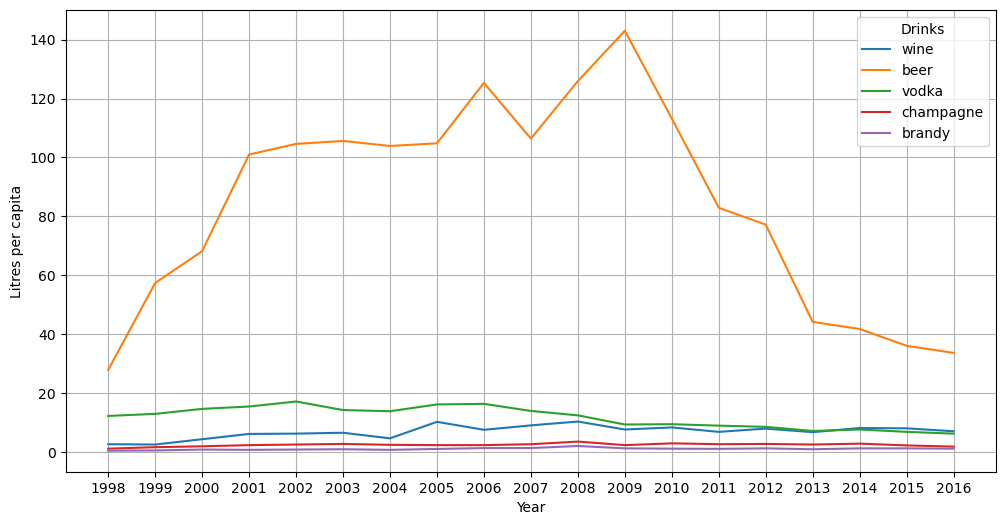

In [8]:
plt.figure(figsize=(12, 6))
for drink in drinks:
    sns.lineplot(data=df_sp[drink], label = drink)

plt.xlabel('Year')
plt.ylabel('Litres per capita')
plt.legend(title='Drinks')
plt.grid(True)
plt.xticks(df_sp.index)
plt.show()


Comment: (a avaliar) Temos uma disparidade muito grande entre os litros de cerveja em relação aos demais. Vale uma análise 

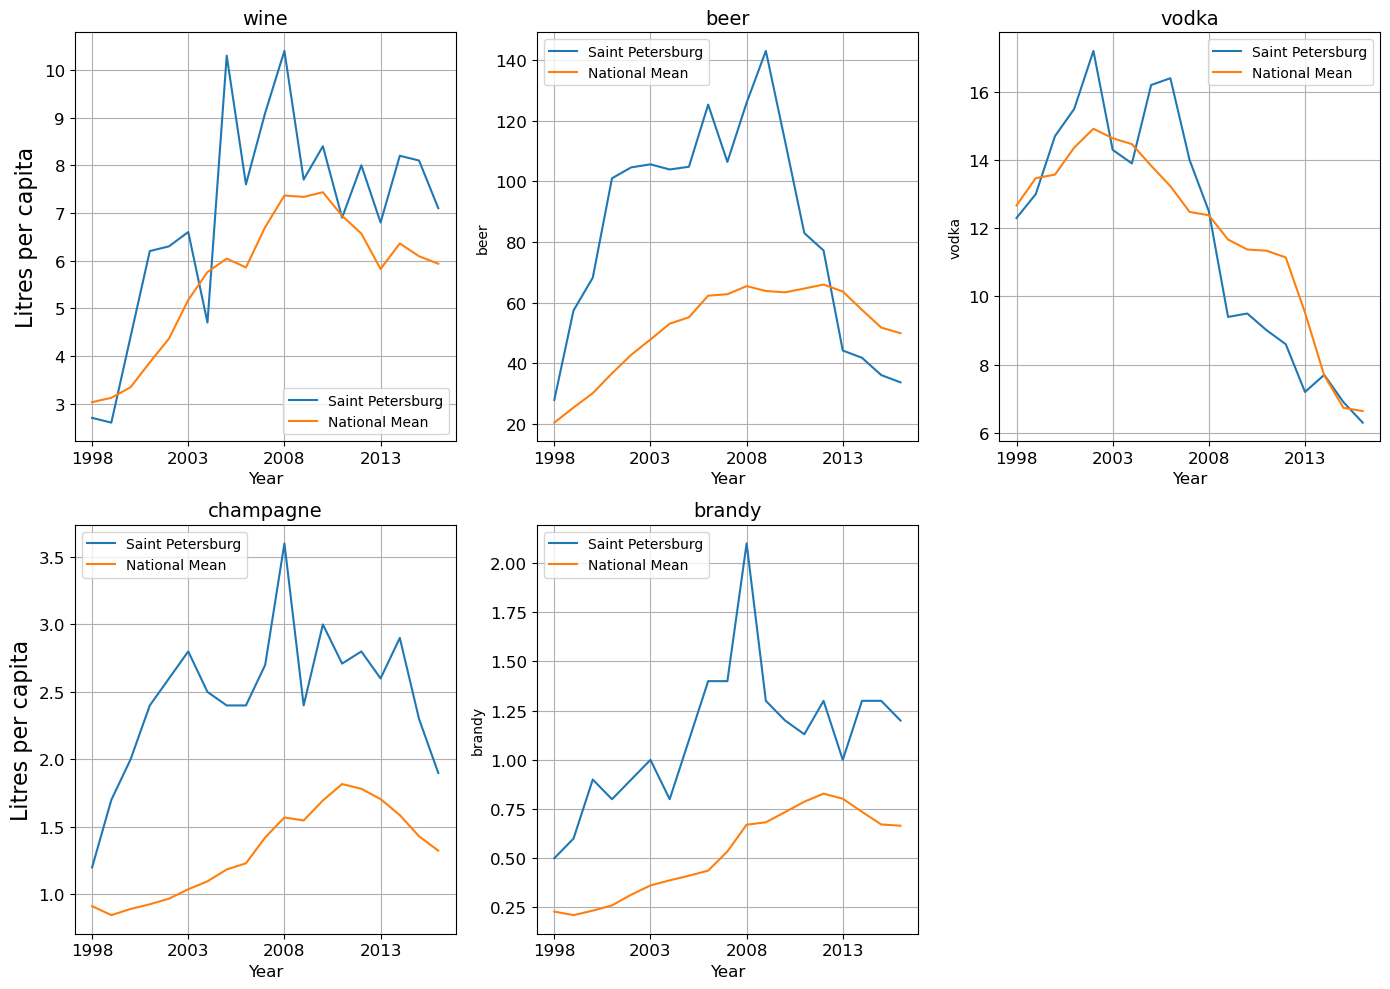

In [13]:
annual_means = df.groupby('year')[drinks].mean().reset_index()

fig, axes = plt.subplots(2, 3, figsize=(14, 10), sharey=False)

# Plotting
for i, drink in enumerate(drinks):
    row, col = divmod(i, 3)
    sns.lineplot(ax=axes[row, col], data=df_sp, x=df_sp.index, y=drink, label='Saint Petersburg')
    sns.lineplot(ax=axes[row, col], data=annual_means, x='year', y=drink, label='National Mean')
    axes[row, col].set_title(drink, fontsize=14) 
    axes[row, col].set_xlabel('Year', fontsize=12)  
    if col == 0:
        axes[row, col].set_ylabel('Litres per capita', fontsize=16) 
    axes[row, col].grid(True)
    axes[row, col].set_xticks(df_sp.index[::5]) 
    axes[row, col].tick_params(axis='both', which='major', labelsize=12)  

# Removing the last square
fig.delaxes(axes[1, 2])
plt.tight_layout()

plt.show()

Comentário: Em valores absolutos vemos um queda nas bebidas a partir de 2008 (a voda começa antes, em 2006).

Por tal motivo vamos entender como é o comportamento relativo ao consumo total de Rússia no período.

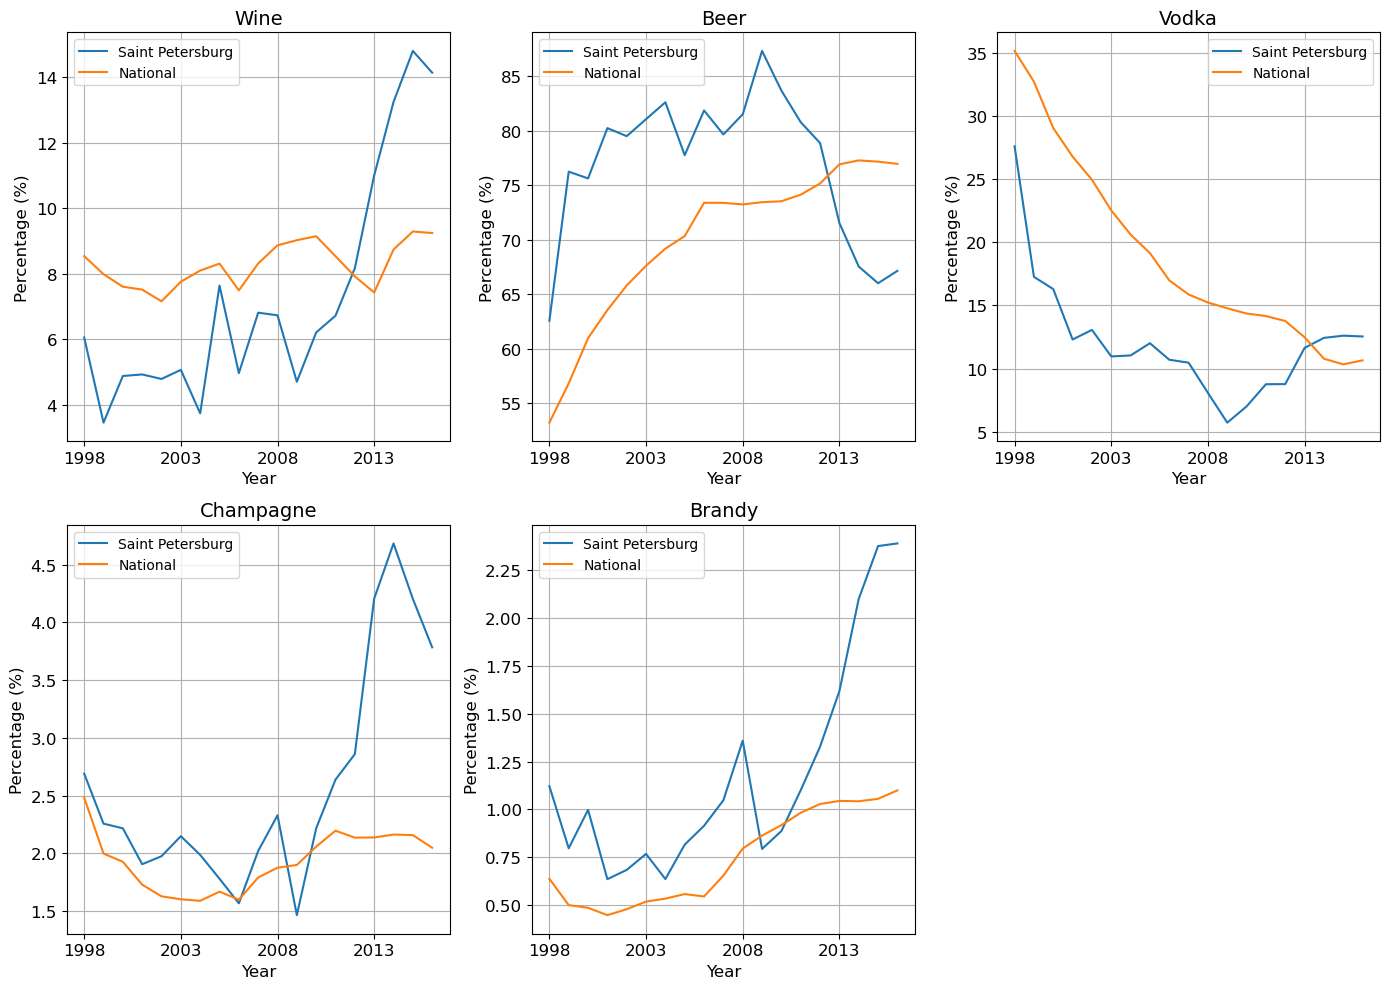

In [20]:
def calcular_porcentagens(df, bebidas, total_col='total_litres'):
    df_perc = df.copy()
    for bebida in bebidas:
        df_perc[f'{bebida}_perc'] = df_perc[bebida] / df_perc[total_col] * 100
    return df_perc

# Calculando as porcentagens para o dataframe nacional (df)
df_perc = calcular_porcentagens(df, drinks)

# Calculando as porcentagens para o dataframe regional (df_sp)
df_sp_perc = calcular_porcentagens(df_sp, drinks)

# Configurações para o gráfico de subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 10), sharey=False)


# Loop para plotar os subplots
for i, drink in enumerate(drinks):
    row, col = divmod(i, 3)
    
    # Plot do regional (df_sp)
    sns.lineplot(ax=axes[row, col], data=df_sp_perc, x=df_sp_perc.index, y=f'{drink}_perc', label='Saint Petersburg')
    
    # Plot do nacional (df)
    sns.lineplot(ax=axes[row, col], data=df_perc, x='year', y=f'{drink}_perc', label='National', errorbar = None)
    
    # Configurações do subplot
    axes[row, col].set_title(drink.capitalize(), fontsize=14)
    axes[row, col].set_xlabel('Year', fontsize=12)
    axes[row, col].set_ylabel('Percentage (%)', fontsize=12)
    axes[row, col].set_xticks(df_sp.index[::5]) 
    axes[row, col].grid(True)
    axes[row, col].tick_params(axis='both', which='major', labelsize=12)
    
# Removendo o subplot vazio
fig.delaxes(axes[1, 2])

# Ajustes finais e exibição do gráfico
plt.tight_layout()
plt.show()

Introdução para a matriz de correlação e omapa de calor

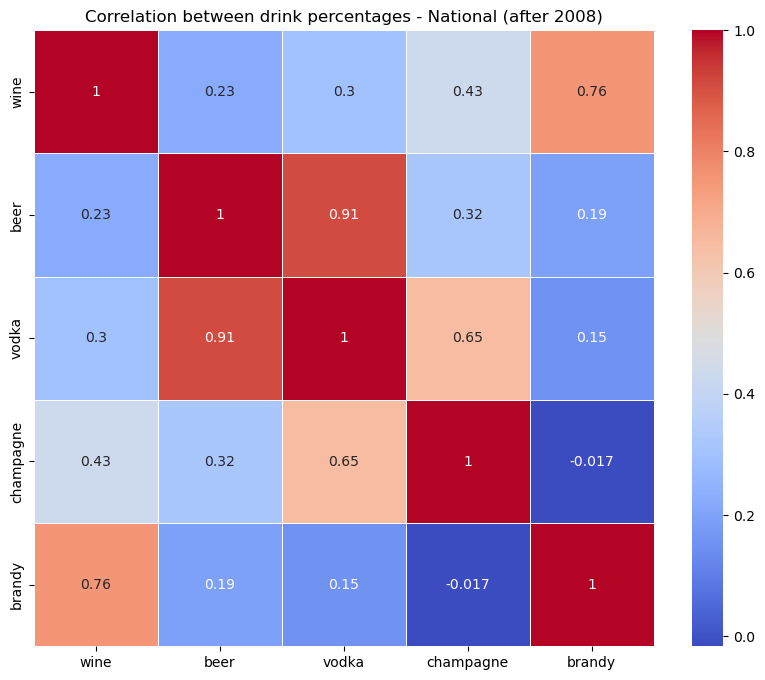

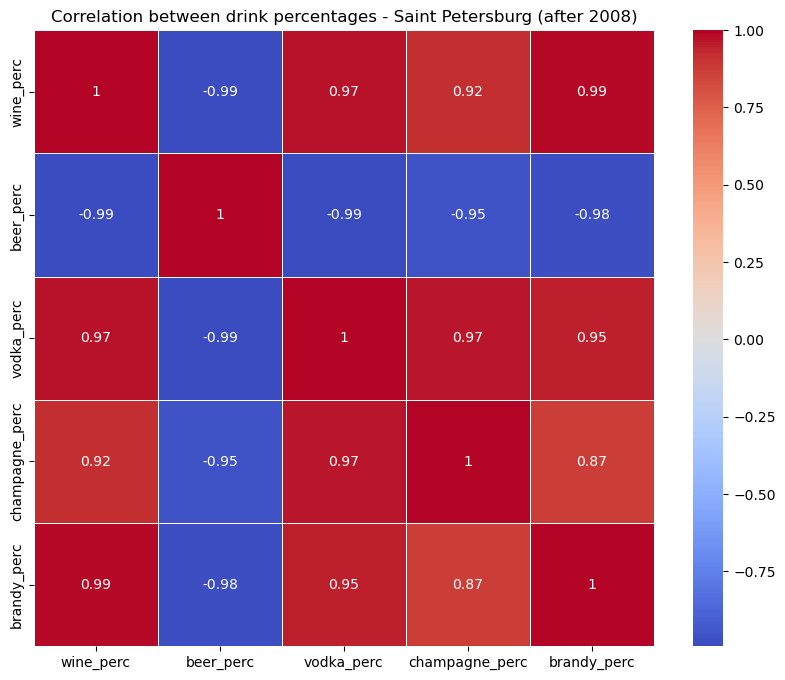

In [19]:
# Função para calcular e plotar a matriz de correlação
def plot_correlation_matrix(df, columns, title):
    # Calcular a matriz de correlação
    correlation_matrix = df[columns].corr()

    # Plotar o mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()


# Lista de colunas de porcentagens
perc_columns = ['wine_perc', 'beer_perc', 'vodka_perc', 'champagne_perc', 'brandy_perc']

# Plotar a matriz de correlação para o dataframe nacional (df_perc) após 2008
plot_correlation_matrix(df_sp[df_sp.index > 2008], drinks, 'Correlation between drinks - Saint Petersburg (after 2008)')

# Plotar a matriz de correlação para o dataframe regional (df_sp_perc) após 2008
plot_correlation_matrix( df_sp_perc[df_sp_perc.index > 2008], perc_columns, 'Correlation between drink percentages - Saint Petersburg (after 2008)')

Leituras:

1. Em valores absolutos temos uma redução no consumo de todas as bebidas no intervalo 2008 em diante.
2. Em termos relativos tem-se um aumento na proporção do consumo de todas as bebidas, exceto cerveja, com uma drástica redução.

Mais especificamente, vinho, champagne e brandy mais que triplicou sua participação no consumo total

Melhorar mais as análises.

### Conclusions 

aasdasdas

## Similarity analysis